In [1]:
import netCDF4 as nc4
import numpy as np
from matplotlib import pyplot as plt
import copy
import pandas as pd
import time
# import xarray as xr

### Read in climate and extract the corresponding time series

In [2]:
# Data path
# AD-spinup history [0001 - 0200]
fad = '/pscratch/sd/s/sshu3/FATES_MRV/fates.test_site.ad_spinup.0001_0200.nc'

# Normal-spinup history [1850 - 1949] 
fsp = '/pscratch/sd/s/sshu3/FATES_MRV/fates.test_site.1850_1949.nc'

# Logging activity history [after 1950]
flg = '/pscratch/sd/s/sshu3/FATES_MRV/fates.test_site.1950_2010.nc'

In [4]:
# Extract site-level ERA data
# This step will take much longer than expected. Usually 1 hour every 10 years
start = time.time()

dtc = nc4.Dataset(fad)
dgpp = dtc['FATES_GPP'][:]
drh = dtc['HR'][:]
dvegc = dtc['FATES_VEGC'][:]
dsoilc = dtc['SOILC'][:]
dtc.close()



In [30]:
# Convert GPP from day to year
dgpp_yr = np.zeros((200))
drh_yr = np.zeros((200))
dvegc_yr = np.zeros((200))
dsoilc_yr = np.zeros((200))
for i in np.arange(0,200):
    dgpp_yr[i] = np.nanmean(dgpp[12*i:12*i+12])*3600.0*24.0*365.0
    drh_yr[i] = np.nanmean(drh[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
    dvegc_yr[i] = np.nanmean(dvegc[12*i:12*i+12])
    dsoilc_yr[i] = np.nanmean(dsoilc[12*i:12*i+12])*1e-3

### Fast plots

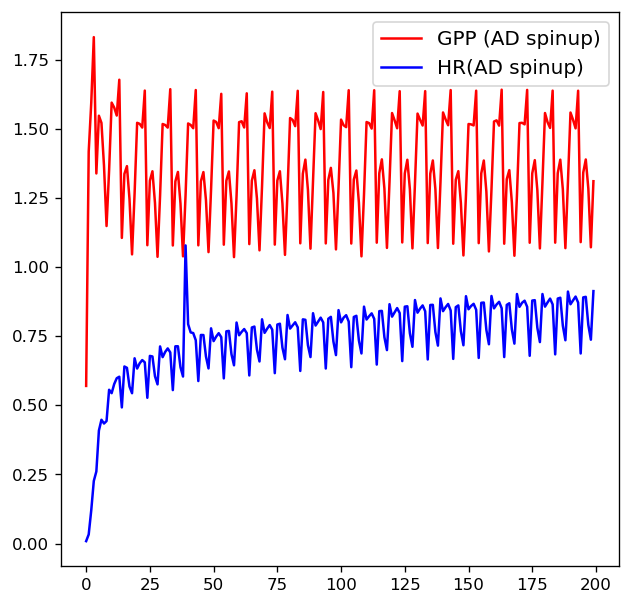

In [31]:
# Plot GPP, HR, gC m-2 
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dgpp_yr[:], 'r-')
plt.plot(yr_axis, drh_yr[:], 'b-')
plt.legend(['GPP (AD spinup)', 'HR(AD spinup)'], fontsize = 12)


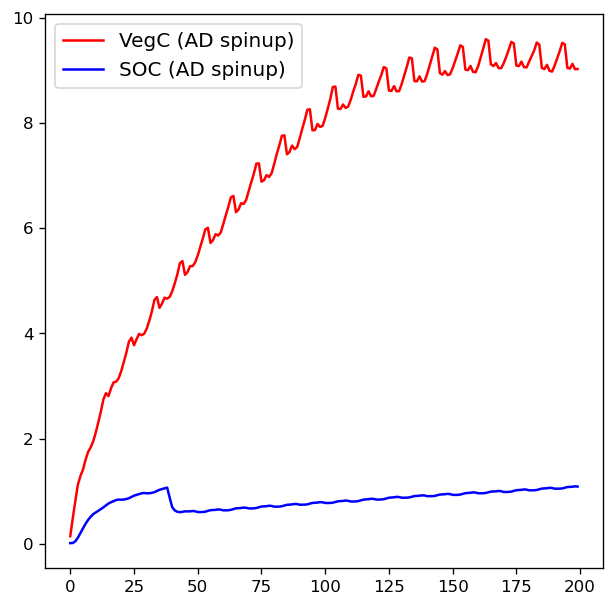

In [29]:
# Plot VegC, SOC, kgC 
yr_axis = np.arange(0, 200)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dvegc_yr[:], 'r-')
plt.plot(yr_axis, dsoilc_yr[:], 'b-')
plt.legend(['VegC (AD spinup)', 'SOC (AD spinup)'], fontsize = 12)

In [37]:
# Normal spinup stage
dtc = nc4.Dataset(fsp)
dgpp = dtc['FATES_GPP'][:]
drh = dtc['HR'][:]
dvegc = dtc['FATES_VEGC'][:]
dsoilc = dtc['SOILC'][:]
dtc.close()


In [38]:
# Convert GPP from day to year
dgpp_yr = np.zeros((100))
drh_yr = np.zeros((100))
dvegc_yr = np.zeros((100))
dsoilc_yr = np.zeros((100))
for i in np.arange(0,100):
    dgpp_yr[i] = np.nanmean(dgpp[12*i:12*i+12])*3600.0*24.0*365.0
    drh_yr[i] = np.nanmean(drh[12*i:12*i+12])*3600.0*24.0*365.0*1e-3
    dvegc_yr[i] = np.nanmean(dvegc[12*i:12*i+12])
    dsoilc_yr[i] = np.nanmean(dsoilc[12*i:12*i+12])*1e-3

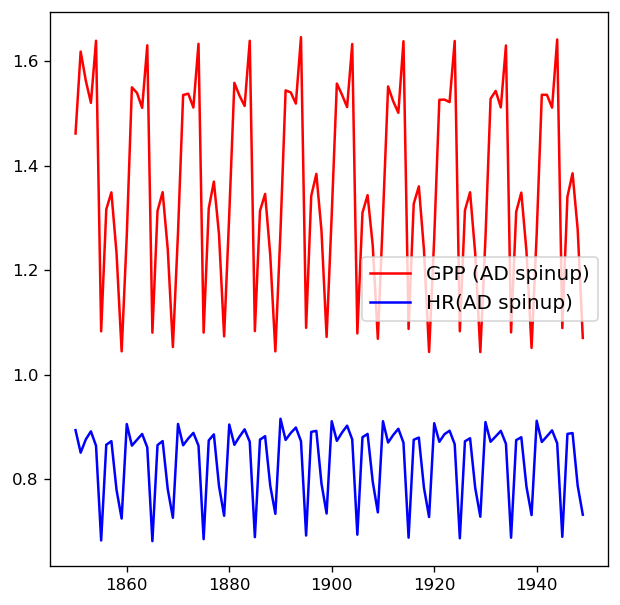

In [39]:
# Plot GPP, HR, gC m-2 
yr_axis = np.arange(1850, 1950)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dgpp_yr[:], 'r-')
plt.plot(yr_axis, drh_yr[:], 'b-')
plt.legend(['GPP (AD spinup)', 'HR(AD spinup)'], fontsize = 12)


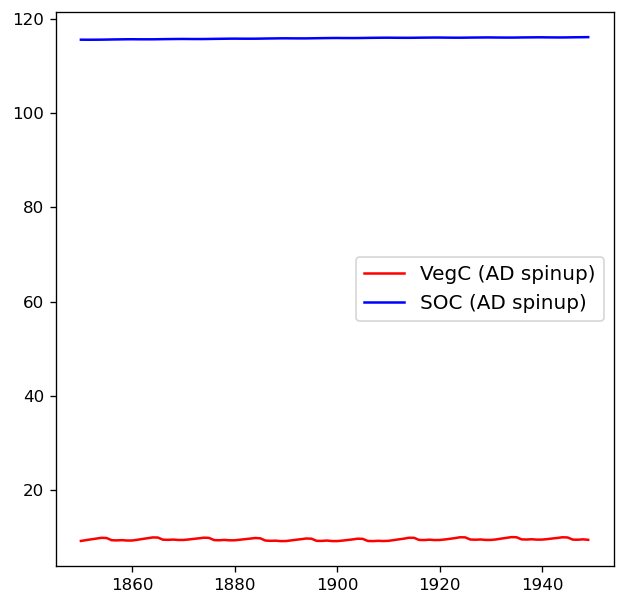

In [41]:
# Plot VegC, SOC, kgC 
yr_axis = np.arange(1850, 1950)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, dvegc_yr[:], 'r-')
plt.plot(yr_axis, dsoilc_yr[:], 'b-')
plt.legend(['VegC (AD spinup)', 'SOC (AD spinup)'], fontsize = 12)

### Logging activity and age distribution

In [49]:
# Logging activity
dtc = nc4.Dataset(flg)
darea_ap = dtc['FATES_PATCHAREA_AP'][:]
dcarea_ap = dtc['FATES_CANOPYAREA_AP'][:]
dsoilc = dtc['SOILC'][:]
dvegc = dtc['FATES_VEGC'][:]
dtc.close()


In [45]:
np.shape(darea_ap)

(120, 7, 1)

In [52]:
# Convert GPP from day to year
darea_ap_yr = np.zeros((10, 7))
dcarea_ap_yr = np.zeros((10, 7))
dsoilc_yr = np.zeros((10))
dvegc_yr = np.zeros((10))
for i in np.arange(0,10):
    darea_ap_yr[i] = np.nanmean(darea_ap[12*i:12*i+12, :, 0], 0)
    dcarea_ap_yr[i] = np.nanmean(dcarea_ap[12*i:12*i+12, :, 0], 0)
    dvegc_yr[i] = np.nanmean(dvegc[12*i:12*i+12])
    dsoilc_yr[i] = np.nanmean(dsoilc[12*i:12*i+12])*1e-3

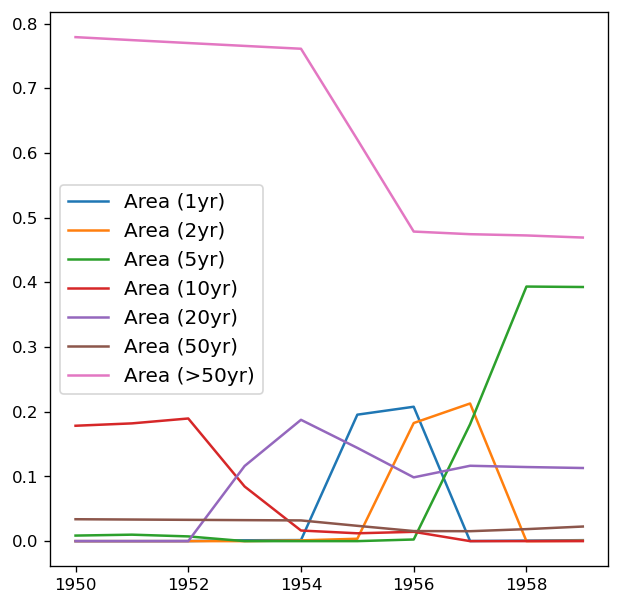

In [48]:
# Plot area change with time 
yr_axis = np.arange(1950, 1960)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
plt.plot(yr_axis, darea_ap_yr[:,0])
plt.plot(yr_axis, darea_ap_yr[:,1])
plt.plot(yr_axis, darea_ap_yr[:,2])
plt.plot(yr_axis, darea_ap_yr[:,3])
plt.plot(yr_axis, darea_ap_yr[:,4])
plt.plot(yr_axis, darea_ap_yr[:,5])
plt.plot(yr_axis, darea_ap_yr[:,6])
plt.legend(['Area (1yr)', 'Area (2yr)', 'Area (5yr)', 'Area (10yr)', 'Area (20yr)', 'Area (50yr)', 'Area (>50yr)'], fontsize = 12)

(116.0, 116.25)

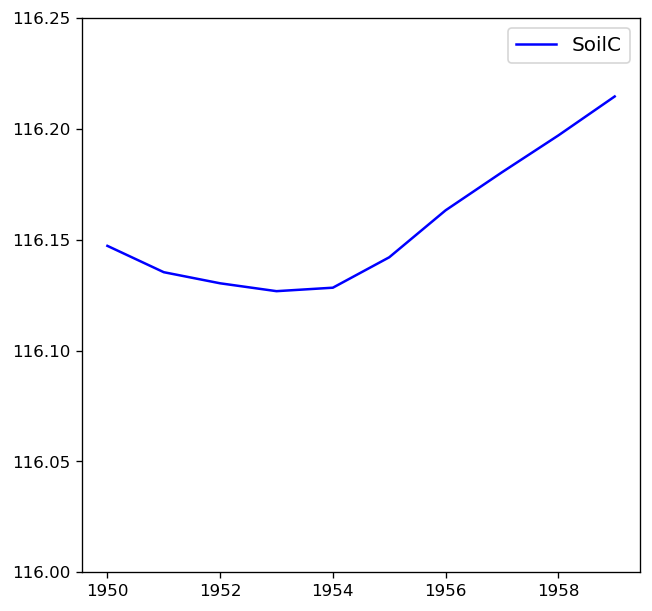

In [59]:
# Plot area change with time 
yr_axis = np.arange(1950, 1960)
plot_len = len(yr_axis)
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(6,6), dpi=120)
# plt.plot(yr_axis, dvegc_yr[:], 'r-')
plt.plot(yr_axis, dsoilc_yr[:], 'b-')
plt.legend(['SoilC'], fontsize = 12)
plt.ylim([116, 116.25])

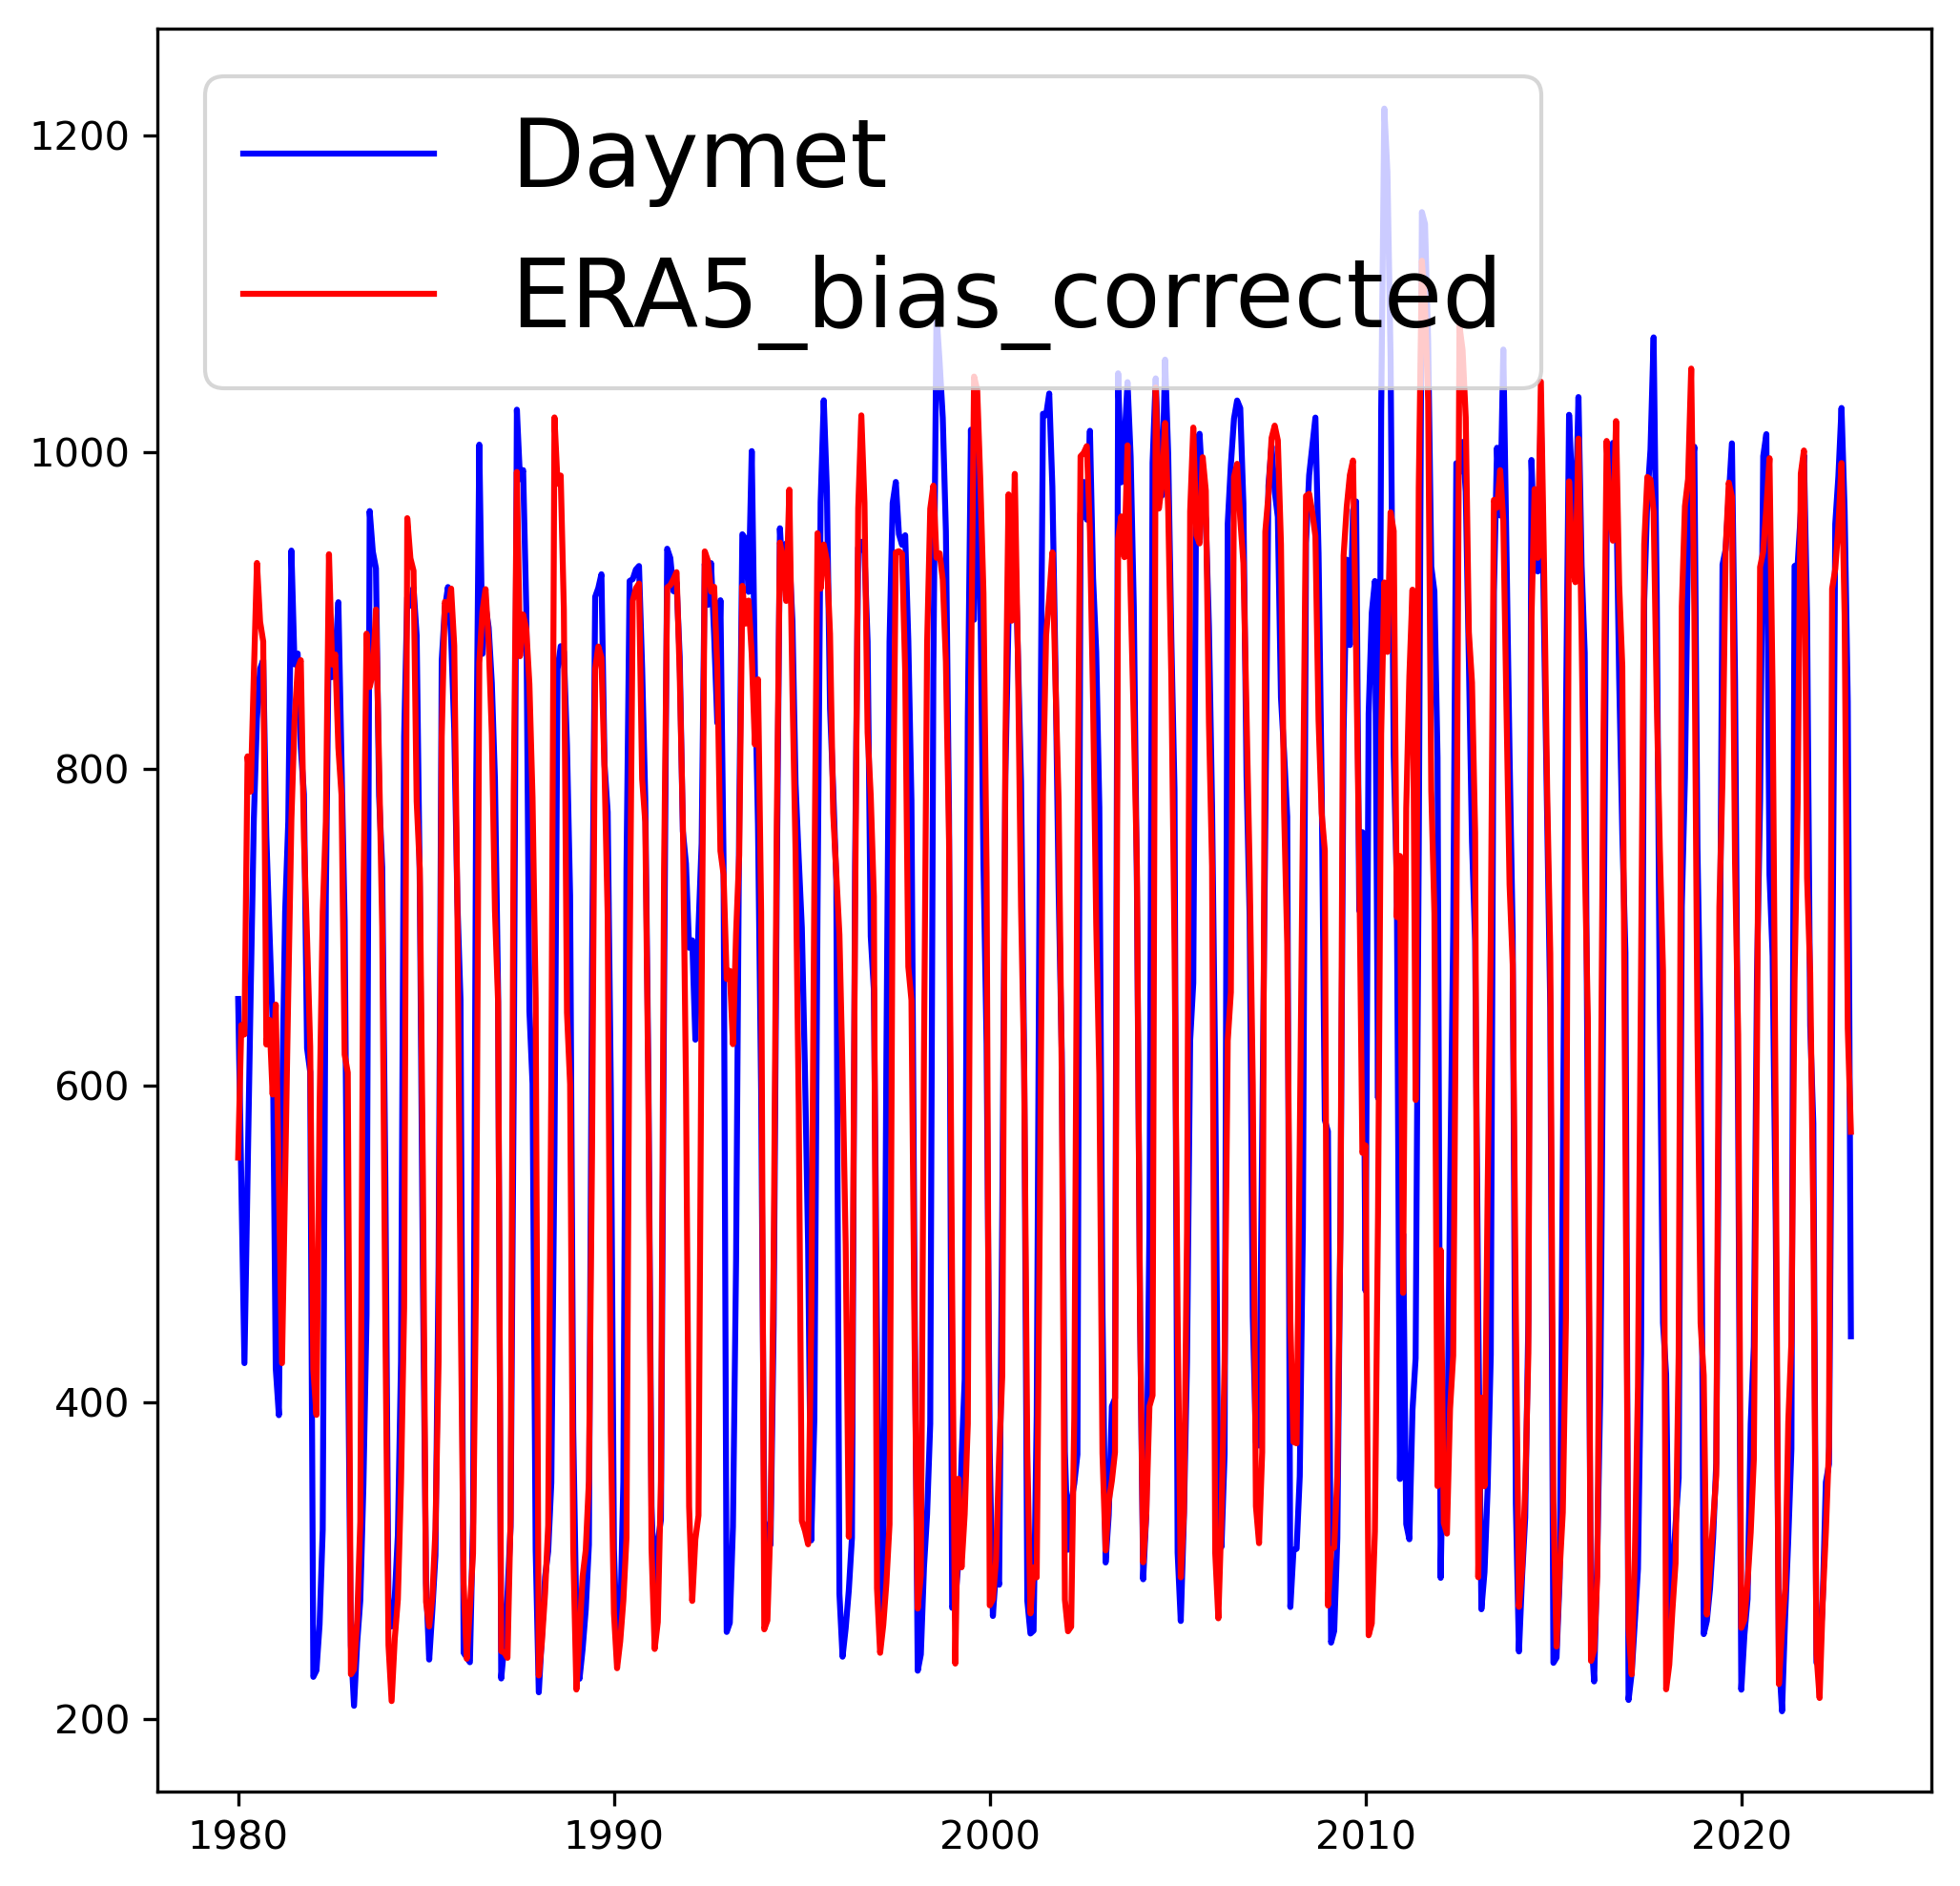

In [32]:
# Comparison EA (Actual vapor pressure, Pa)
yr_axis = np.arange(1980, 2023, 1.0/12.0)
plot_len = len(yr_axis)
sr_ea_daymet_mo = np.zeros((len(yr_axis)))
for i in np.arange(1980,2023):
    for j in np.arange(1,13):
        jday_beg_pt = 365*(i-1980)+jday_beg[j-1]
        jday_end_pt = 365*(i-1980)+jday_end[j-1]
        sr_ea_daymet_mo[(i-1980)*12+j-1] = np.nanmean(sr_ea_daymet[jday_beg_pt:jday_end_pt])
# Tmax, not sure how terra climate calculate Tmax and Tmin, 
# but it shall be monthly mean of daily Tmax and Tmin
fig = plt.figure(figsize=(8,8), dpi=300)
plt.plot(yr_axis, sr_ea_daymet_mo[0:plot_len], 'b-')
plt.plot(yr_axis, sr_ea_era[0:plot_len], 'r-')
plt.legend(['Daymet', 'ERA5_bias_corrected'], fontsize = 24)


### Other bias correction if needed?